In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

np.random.seed(4)

Using TensorFlow backend.


In [2]:
stock_data = yf.download('AAPL','2012-01-03','2020-03-13')
raw_data = stock_data.filter(['Close'])
raw_data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(raw_data)
scaled_data.shape

(2061, 1)

In [4]:
data_len = len(scaled_data)
data = scaled_data[:data_len, : ]
seed_len = 60

x = []
y = []

for i in range(seed_len, len(data)):
    x.append(data[i-seed_len:i, 0])
    y.append(data[i, 0])
    

x = np.array(x)
y = np.array(y)

x = np.reshape(x, (x.shape[0], x.shape[1], 1))
y = np.reshape(y, (y.shape[0], 1))

In [5]:
train_data_len = math.ceil(data_len * 0.8)

x_train = x[:train_data_len]
y_train = y[:train_data_len]

x_test = x[train_data_len:]
y_test = y[train_data_len:]

In [6]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [7]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1649/1649 [==============================] - 8s 5ms/step - loss: 0.0070
Epoch 2/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0014
Epoch 3/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0010
Epoch 4/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0013
Epoch 5/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0010
Epoch 6/100
1649/1649 [==============================] - 7s 4ms/step - loss: 9.5400e-04
Epoch 7/100
1649/1649 [==============================] - 7s 4ms/step - loss: 9.7030e-04
Epoch 8/100
1649/1649 [==============================] - 7s 4ms/step - loss: 8.6646e-04
Epoch 9/100
1649/1649 [==============================] - 7s 4ms/step - loss: 9.2959e-04
Epoch 10/100
1649/1649 [==============================] - 7s 4ms/step - loss: 8.1790e-04
Epoch 11/100
1649/1649 [==============================] - 7s 4ms/step - loss: 8.1750e-04
Epoch 12/100
1649/1649 [==========================

1649/1649 [==============================] - 7s 4ms/step - loss: 3.0806e-04
Epoch 94/100
1649/1649 [==============================] - 7s 4ms/step - loss: 3.2941e-04
Epoch 95/100
1649/1649 [==============================] - 7s 4ms/step - loss: 3.0449e-04
Epoch 96/100
1649/1649 [==============================] - 7s 4ms/step - loss: 3.2469e-04
Epoch 97/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.8153e-04
Epoch 98/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.9845e-04
Epoch 99/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.7253e-04
Epoch 100/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.7415e-04


In [8]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

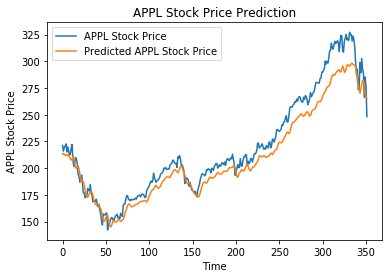

In [9]:
plt.plot(scaler.inverse_transform(y_test), label = 'APPL Stock Price')
plt.plot(predicted_stock_price, label = 'Predicted APPL Stock Price')
plt.title('APPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPL Stock Price')
plt.legend()
plt.show()